<a href="https://colab.research.google.com/github/Anirudh-2712/Exploratory-Data-analysis/blob/main/module7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime Data Analysis (module 7)

### Anirudh Agrawal
### 22BCE2191
### C2 slot


## Linear Regression Model for crimes dataset



importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Load crimes.csv

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Crime.csv')
print(df.head())
print(df.dtypes)

   rownames  county  year    crmrte    prbarr   prbconv   prbpris  avgsen  \
0         1       1    81  0.039885  0.289696  0.402062  0.472222    5.61   
1         2       1    82  0.038345  0.338111  0.433005  0.506993    5.59   
2         3       1    83  0.030305  0.330449  0.525703  0.479705    5.80   
3         4       1    84  0.034726  0.362525  0.604706  0.520104    6.89   
4         5       1    85  0.036573  0.325395  0.578723  0.497059    6.55   

      polpc   density  ...     lwfir     lwser     lwmfg     lwfed     lwsta  \
0  0.001787  2.307159  ...  5.607452  5.374044  5.434246  6.014619  5.464848   
1  0.001767  2.330254  ...  5.706707  5.444911  5.482013  6.039540  5.536862   
2  0.001836  2.341801  ...  5.736475  5.481292  5.597310  6.084157  5.522900   
3  0.001886  2.346420  ...  5.858180  5.531204  5.640985  6.129421  5.568077   
4  0.001924  2.364896  ...  5.948220  5.564850  5.700042  6.195282  5.639919   

      lwloc  lpctymle   lpctmin    ltaxpc      lmix  
0 

Plotting heatmap to see correlation between variables

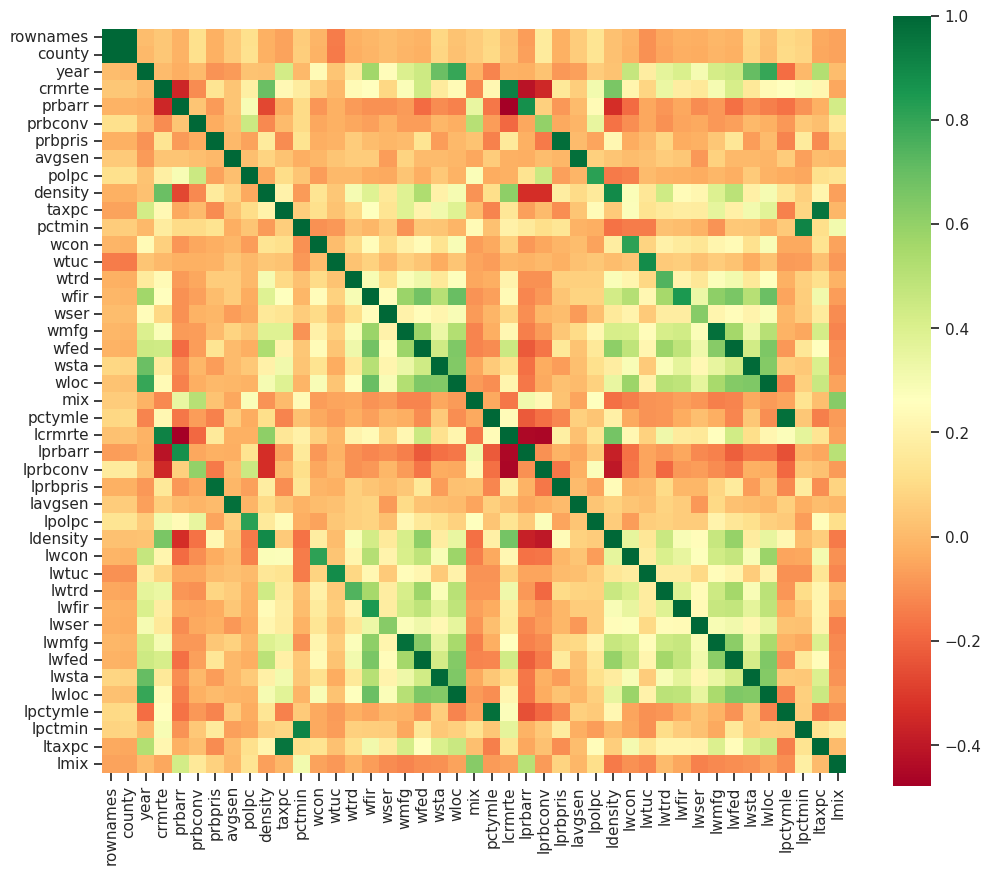

In [8]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), square=True, cmap='RdYlGn', annot=False)
plt.show()

model evaluation

     Actual  Predicted
0  0.044196   0.026009
1  0.020729   0.028286
2  0.039308   0.033234
3  0.062311   0.072235
4  0.012874   0.027424
5  0.036537   0.035099
6  0.037154   0.032325
7  0.017316   0.025969
8  0.031426   0.032707
9  0.032113   0.024008


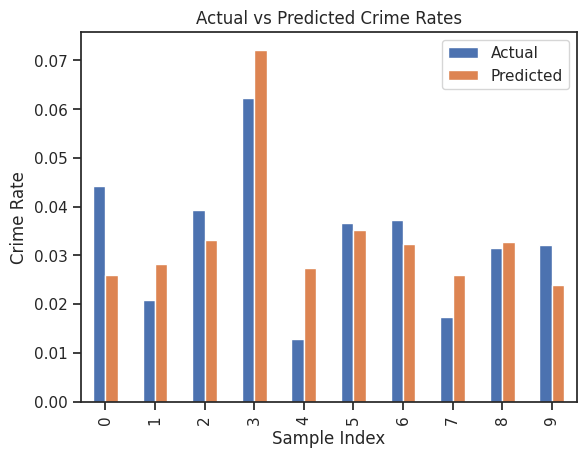

In [11]:
X = df[['density']]
y = df[['crmrte']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(evaluate.head(10))

evaluate.head(10).plot(kind='bar')
plt.title("Actual vs Predicted Crime Rates")
plt.xlabel("Sample Index")
plt.ylabel("Crime Rate")
plt.show()

Scoring the model

In [12]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

R2 Score: 0.37114889773877635
Mean Absolute Error (MAE): 0.009237734953070776
Mean Squared Error (MSE): 0.0002276837257991247
